In [1]:
import pandas as pd

# Load the simulation results CSV
df = pd.read_csv("simulation_results.csv")  # Replace with your actual file
df.head()


,Component,Name,Start_Time,End_Time,Total_Time,Assembly_Time,Main_Assembly_Time,Transport_Time,Status,Transport_Delay
0,Processor,Processor_0,0.0,9.451656,9.451656,1.0,5.000000,2.0,Success,-1.451656
1,GraphicsCard,GraphicsCard_0,0.0,17.521497,17.521497,1.0,5.000000,2.0,Success,-9.521497
2,Storage,Storage_0,0.0,24.646424,24.646424,1.0,3.922533,2.0,Success,-17.723891
3,Box,Box_0,0.0,31.980454,31.980454,1.0,3.922533,2.0,Success,-25.057922
4,CoolingSystem,CoolingSystem_11,0.0,36.000000,36.000000,12.0,4.447732,4.0,Success,-15.552268


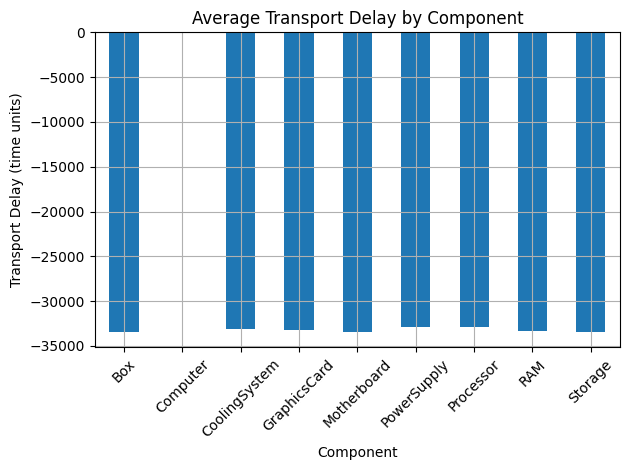

In [2]:
import matplotlib.pyplot as plt

# Calculate and plot average transport delay
df['Transport_Delay'] = df['Transport_Time'] - (
    df['End_Time'] - df['Start_Time'] - df['Assembly_Time'] - df['Main_Assembly_Time']
)

df.groupby('Component')['Transport_Delay'].mean().plot(kind='bar', title="Average Transport Delay by Component")
plt.ylabel("Transport Delay (time units)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



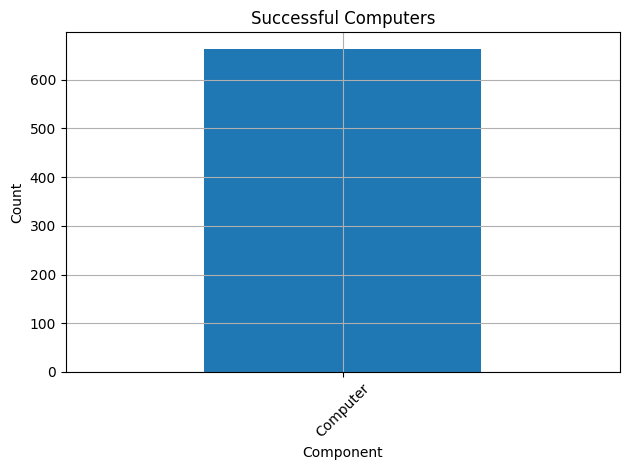

In [3]:
import matplotlib.pyplot as plt

# Filter only successful computers
successful_computers = df[(df['Component'] == 'Computer') & (df['Status'] == 'Success')]

# Check if there are any successful computers before plotting
if not successful_computers.empty:
    successful_computers.groupby('Component').size().plot(kind='bar', title="Successful Computers", ylabel="Count", xlabel="Component")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No successful computers to display.")


In [4]:
# Table showing success and failure counts per component
summary_table = df.groupby('Component')['Status'].value_counts().unstack().fillna(0)
summary_table

Status,Success
Component,
Box,1000
Computer,664
CoolingSystem,1000
GraphicsCard,1000
Motherboard,1000
PowerSupply,1000
Processor,1000
RAM,1000
Storage,1000


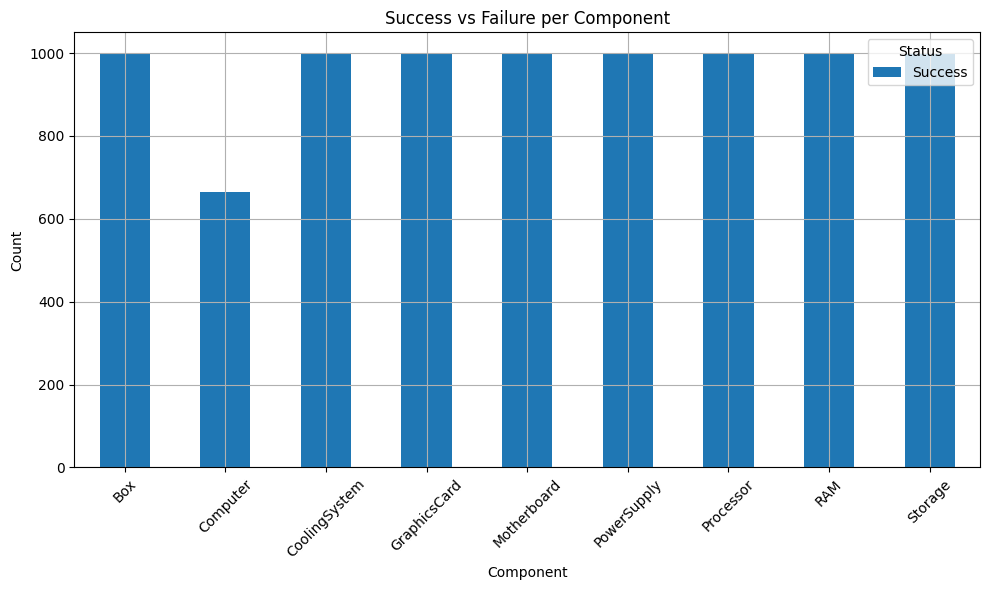

In [5]:
# Plot success vs failure stacked
summary_table.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Success vs Failure per Component')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


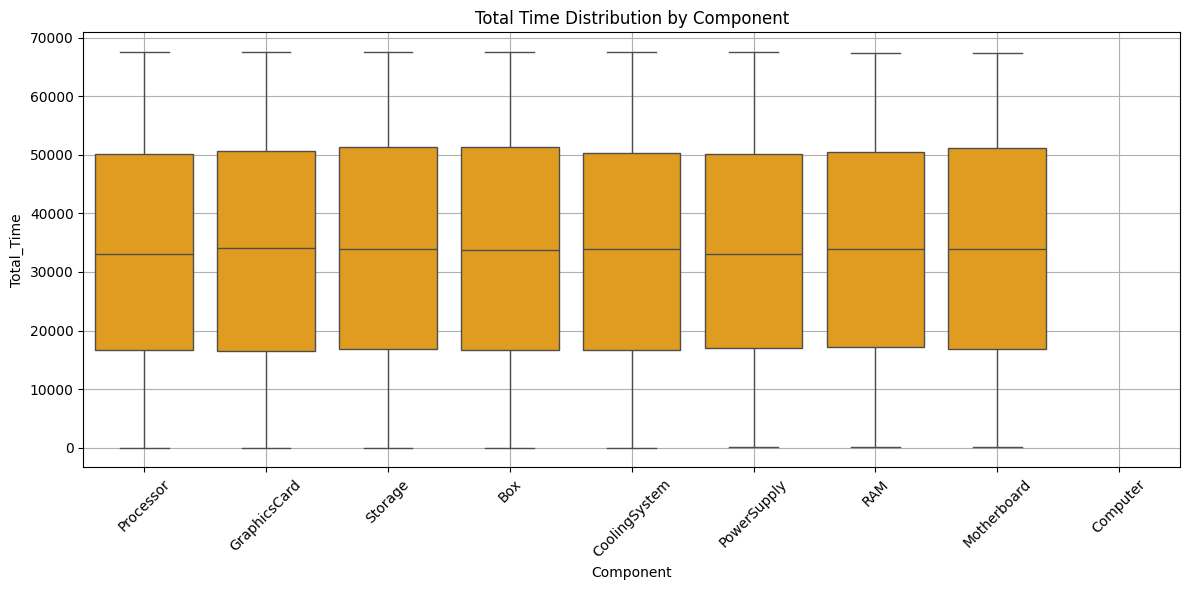

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to see variability in total time
plt.figure(figsize=(12,6))
sns.boxplot(x="Component", y="Total_Time", data=df, color='orange')
plt.title("Total Time Distribution by Component")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


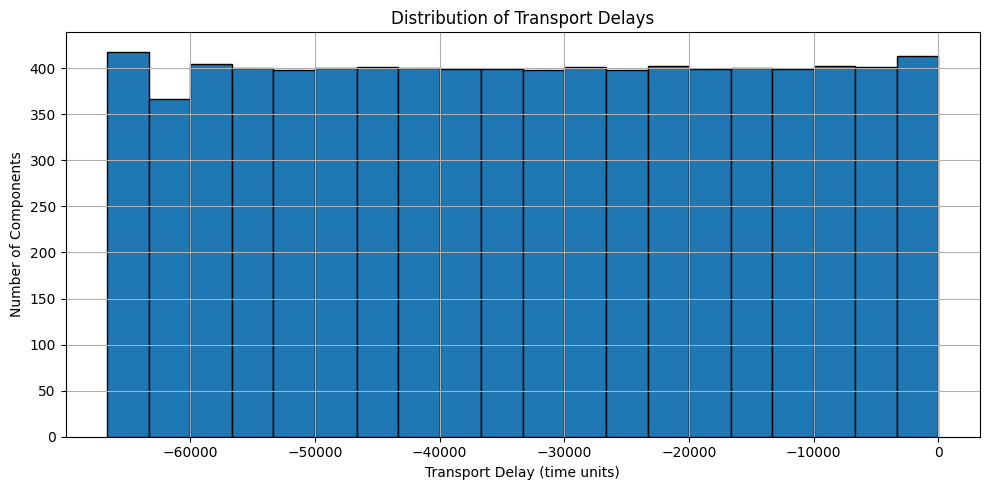

In [7]:
# Histogram of transport delays
plt.figure(figsize=(10,5))
plt.hist(df['Transport_Delay'], bins=20, edgecolor='black')
plt.title('Distribution of Transport Delays')
plt.xlabel('Transport Delay (time units)')
plt.ylabel('Number of Components')
plt.grid(True)
plt.tight_layout()
plt.show()


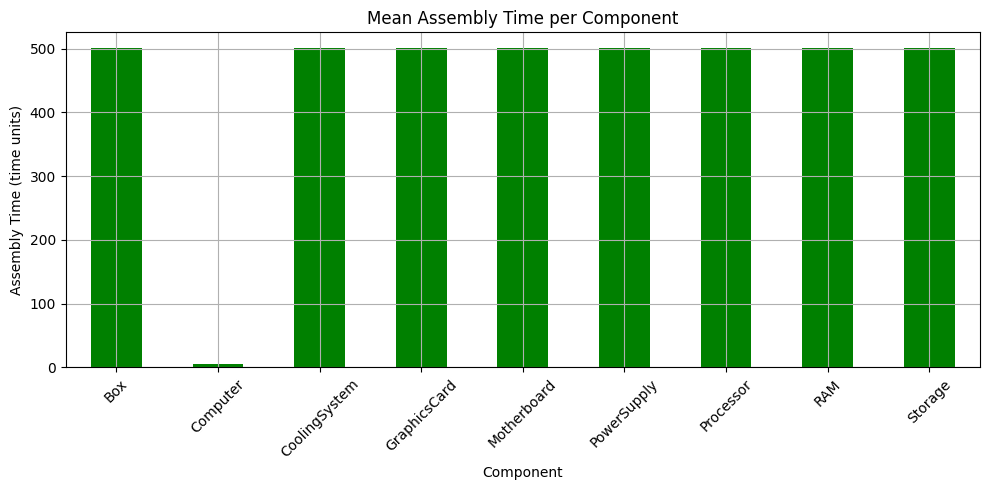

In [8]:
# Mean assembly time per component
df.groupby('Component')['Assembly_Time'].mean().plot(kind='bar', figsize=(10,5), title='Mean Assembly Time per Component', color='green')
plt.ylabel('Assembly Time (time units)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


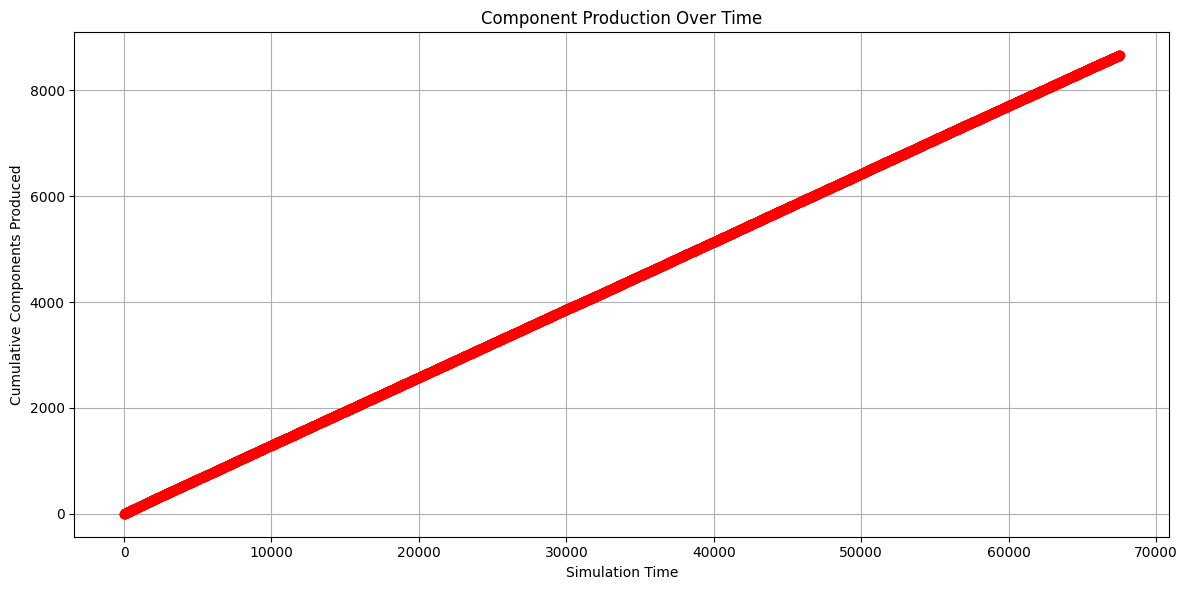

In [9]:
# Plot how many components are assembled over simulation time
df_sorted = df.sort_values('End_Time')
plt.figure(figsize=(12,6))
plt.plot(df_sorted['End_Time'], range(1, len(df_sorted)+1), marker='o', color='red')
plt.title("Component Production Over Time")
plt.xlabel("Simulation Time")
plt.ylabel("Cumulative Components Produced")
plt.grid(True)
plt.tight_layout()
plt.show()


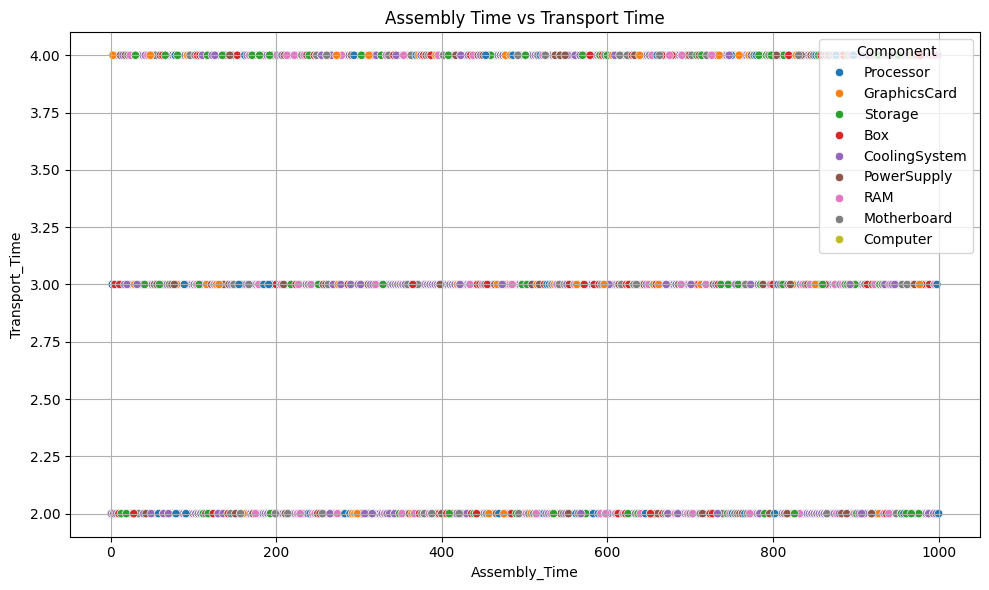

In [10]:
# Scatter plot of Assembly Time vs Transport Time
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Assembly_Time", y="Transport_Time", hue="Component")
plt.title("Assembly Time vs Transport Time")
plt.grid(True)
plt.tight_layout()
plt.show()


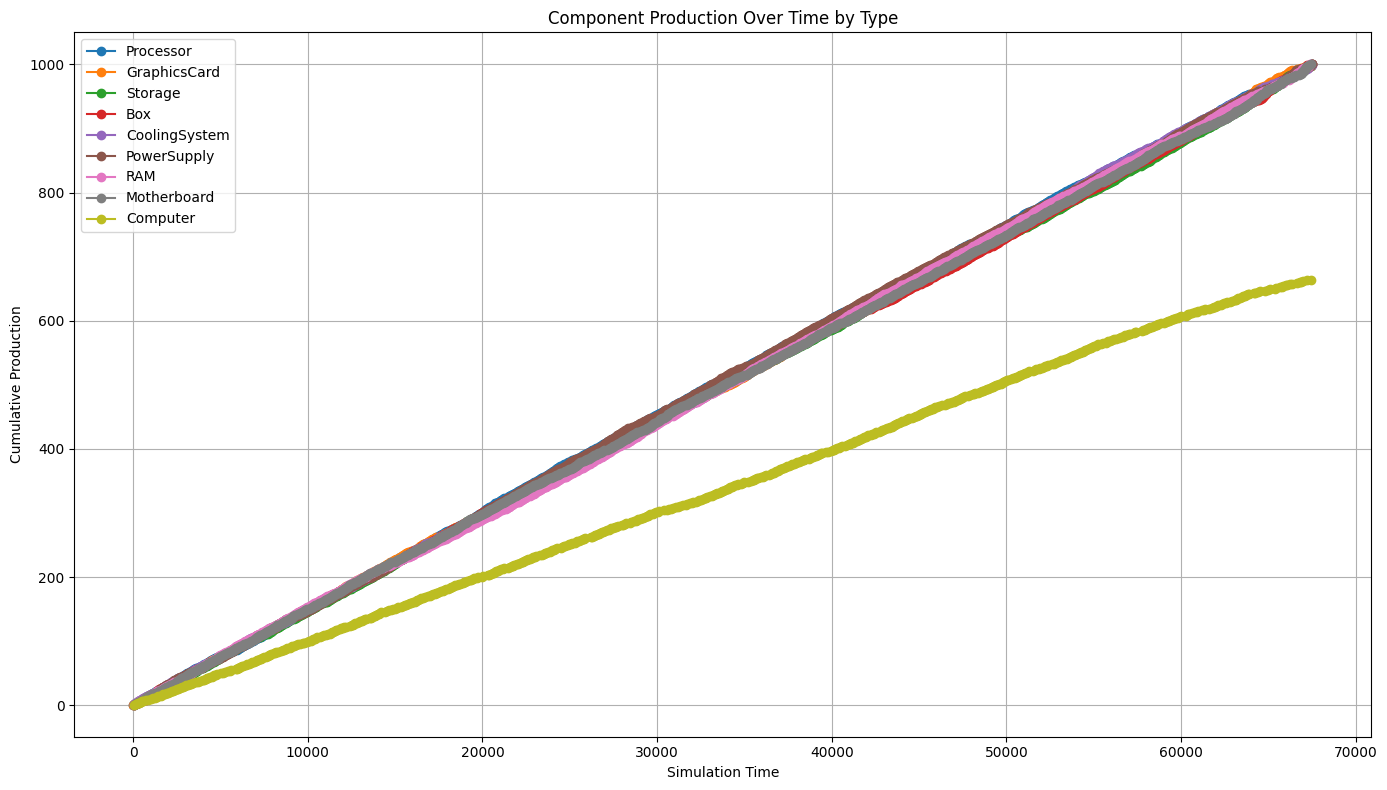

In [11]:
plt.figure(figsize=(14,8))
for component in df['Component'].unique():
    subset = df[df['Component'] == component].sort_values('End_Time')
    plt.plot(subset['End_Time'], range(1, len(subset)+1), marker='o', label=component)

plt.title("Component Production Over Time by Type")
plt.xlabel("Simulation Time")
plt.ylabel("Cumulative Production")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


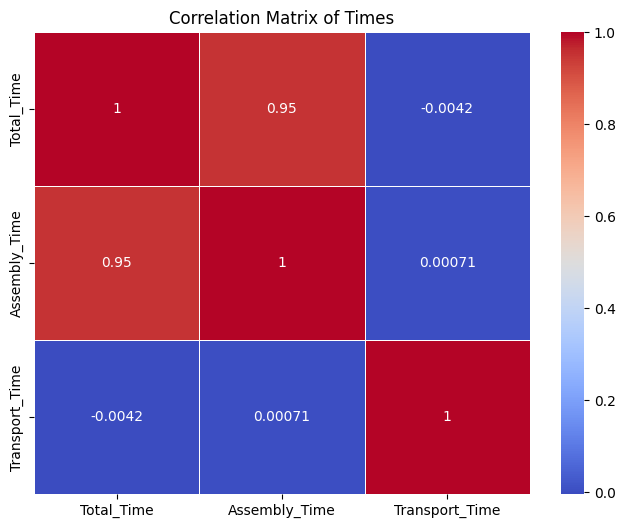

In [12]:
import seaborn as sns

# Calculate correlation matrix
corr = df[['Total_Time', 'Assembly_Time', 'Transport_Time']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Times")
plt.show()


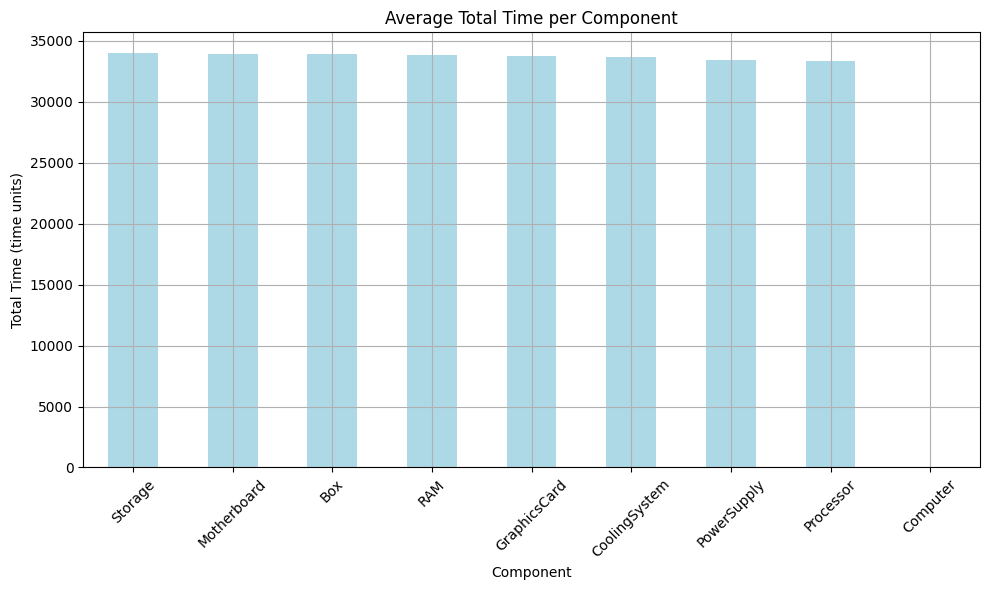

In [13]:
# Average total time per component sorted
avg_total_time = df.groupby('Component')['Total_Time'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_total_time.plot(kind='bar', color='lightblue')
plt.title("Average Total Time per Component")
plt.ylabel("Total Time (time units)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


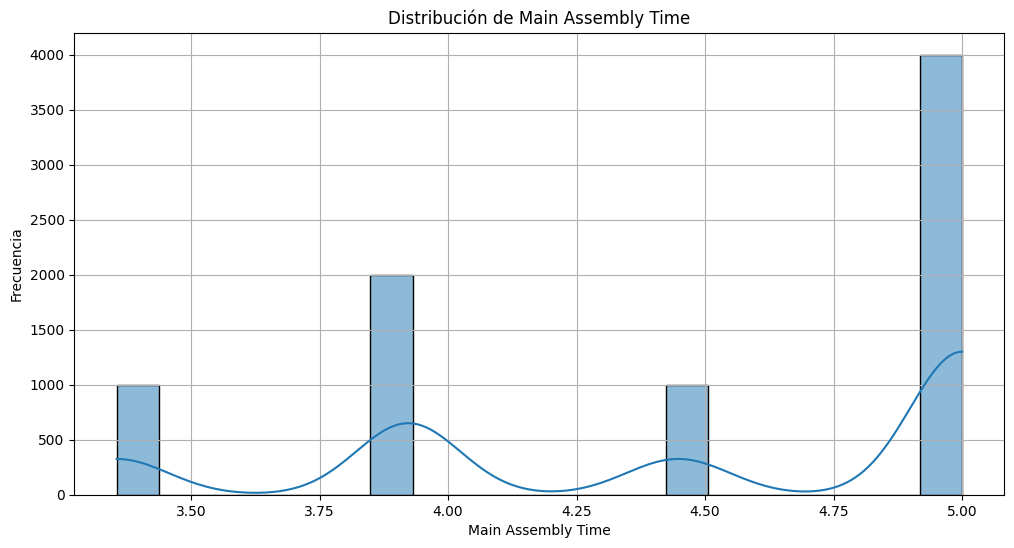

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Main_Assembly_Time"], kde=True, bins=20)
plt.title('Distribución de Main Assembly Time')
plt.xlabel('Main Assembly Time')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

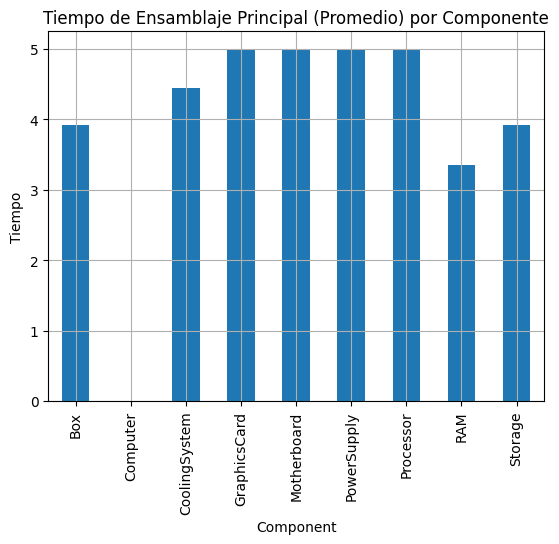

In [15]:
import pandas as pd

# Cargar los resultados de la simulación
df_results = pd.read_csv('simulation_results.csv')


import matplotlib.pyplot as plt

# Plot Main Assembly Time by Component
plt.figure()
df_results.groupby('Component')['Main_Assembly_Time'].mean().plot(kind='bar')
plt.title('Tiempo de Ensamblaje Principal (Promedio) por Componente')
plt.ylabel('Tiempo')
plt.grid()
plt.show()


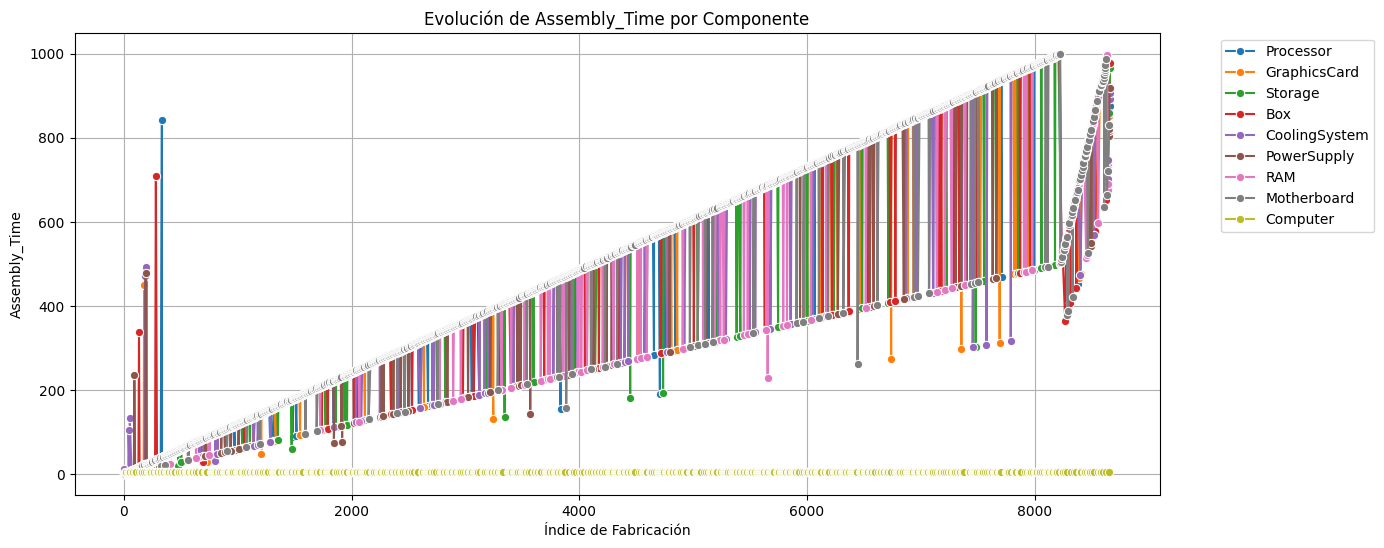

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que df_results está cargado:
# df_results = pd.read_csv('simulation_results.csv')

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_results, x=df_results.index, y="Assembly_Time", hue="Component", marker="o")
plt.title('Evolución de Assembly_Time por Componente')
plt.xlabel('Índice de Fabricación')
plt.ylabel('Assembly_Time')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


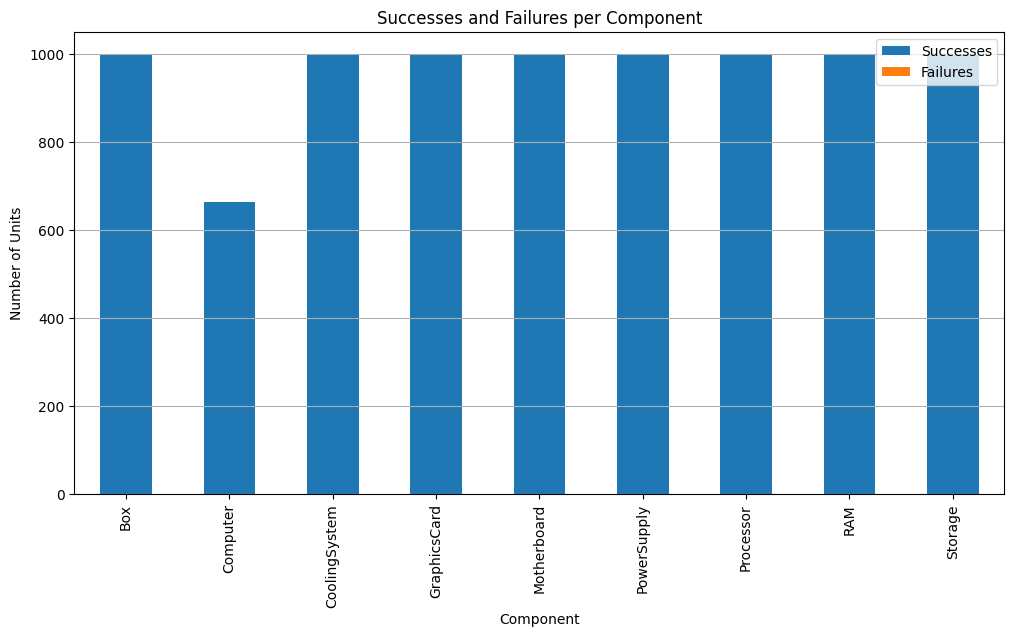

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the results (if not loaded yet)
df_results = pd.read_csv('simulation_results.csv')

# Create a new column: Successful (1) or Failed (0)
df_results['Success'] = df_results['Status'].apply(lambda x: 1 if x == "Success" else 0)

# Group by component
failure_summary = df_results.groupby('Component')['Success'].agg(['count', 'sum'])
failure_summary['Failures'] = failure_summary['count'] - failure_summary['sum']

# Plot
failure_summary[['sum', 'Failures']].rename(columns={'sum': 'Successes'}).plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)
plt.title('Successes and Failures per Component')
plt.xlabel('Component')
plt.ylabel('Number of Units')
plt.grid(axis='y')
plt.show()
